In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

In [43]:
#Obtain sales, store data
trainingData = pd.read_csv('train.csv', sep=',', low_memory=False)
stores = pd.read_csv('store.csv',sep=',', low_memory=False)
stores.shape
#Checking for missing values in train data
trainingData.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [77]:
#Check for stores that are open without any sales and customers
trainingData.groupby(['Customers']).agg({'Sales': np.sum, 'Open': np.sum})

,Open,Sales
Customers,,
0,52,0
3,1,0
5,1,0
8,1,46
13,1,124
18,1,133
36,1,297
40,1,286
44,1,316


In [44]:
#Assume closed stores to be open and fill 1 for zero sales
trainingData.loc[trainingData.Open.isnull(), 'Open'] = 1
trainingData.loc[trainingData.Sales.isnull(), 'Sales'] = 1

In [45]:
#Check for missing values in store data
stores.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [46]:
stores.groupby(['CompetitionOpenSinceYear']).CompetitionOpenSinceMonth.agg(['max','min','count'])

,max,min,count
CompetitionOpenSinceYear,,,
1900,1,1,1
1961,10,10,1
1990,7,6,5
1994,11,11,2
1995,11,10,2
1998,7,7,1
1999,12,5,8
2000,11,3,10
2001,12,3,16


In [15]:
stores.groupby(['Promo2SinceYear']).Promo2SinceWeek.agg(['max','min','count'])

,max,min,count
Promo2SinceYear,,,
2009,45,31,73
2010,50,5,64
2011,48,5,128
2012,48,1,81
2013,45,1,120
2014,49,1,95
2015,23,6,10


In [47]:
stores.PromoInterval.value_counts()

Jan,Apr,Jul,Oct     335
Feb,May,Aug,Nov     130
Mar,Jun,Sept,Dec    106
Name: PromoInterval, dtype: int64

In [48]:
#Fill in the values for CompetitionOpenSince[Year/Month] and Promo2Since[Year/Week] with most recent periods. Compute mean of 
#CompetitionDistance and fill the missing values with the mean
stores.CompetitionOpenSinceYear.fillna(2015, inplace=True)
stores.CompetitionOpenSinceMonth.fillna(8, inplace=True)
stores.Promo2SinceYear.fillna(2015, inplace=True)
stores.Promo2SinceWeek.fillna(26, inplace=True)
stores.PromoInterval.fillna('Jan,Apr,Jul,Oct',inplace=True )
mean_comp_distance = stores.CompetitionDistance.mean()
stores.CompetitionDistance.fillna(mean_comp_distance, inpalce = True)

In [51]:
#Merge train and store sets on Store
trainingData = pd.merge(trainingData,stores,on='Store')
trainingData.head(1)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270,9,2008,0,26,2015,"Jan,Apr,Jul,Oct"


In [122]:
trainingData.Sales.describe()

count    1017209.000000
mean        5773.818972
std         3849.926175
min            0.000000
25%         3727.000000
50%         5744.000000
75%         7856.000000
max        41551.000000
Name: Sales, dtype: float64

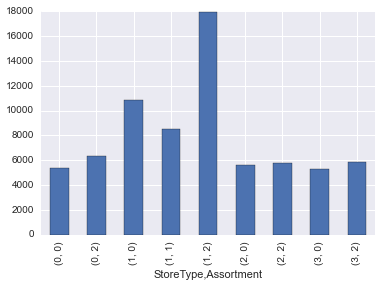

In [94]:
#Mean sales for store type and assortment
trainingData.groupby(['StoreType', 'Assortment']).Sales.mean().plot(kind = 'bar')

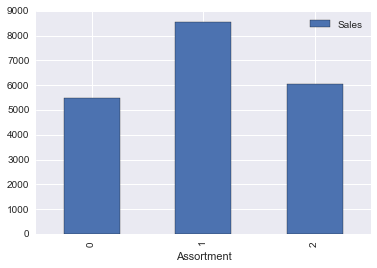

In [95]:
#Mean sales for assortment
trainingData[['Sales', 'Assortment']].groupby('Assortment').mean().plot(kind='bar')

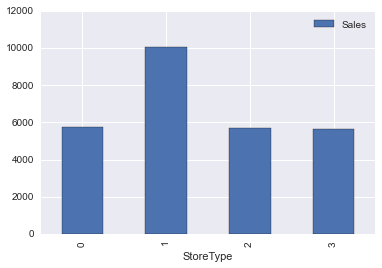

In [96]:
#Mean sales for storetype
trainingData[['Sales', 'StoreType']].groupby('StoreType').mean().plot(kind='bar')

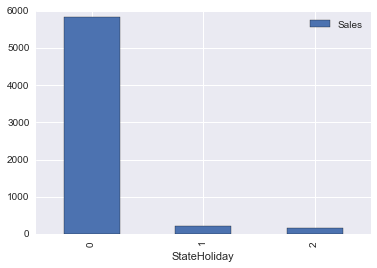

In [99]:
#Mean sales on StateHoliday
trainingData[['Sales', 'StateHoliday']].groupby('StateHoliday').mean().plot(kind='bar')

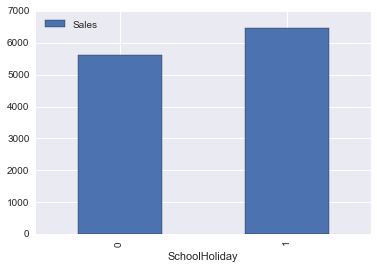

In [100]:
#Mean sales on SchoolHoliday
trainingData[['Sales','SchoolHoliday']].groupby('SchoolHoliday').mean().plot(kind = 'bar')

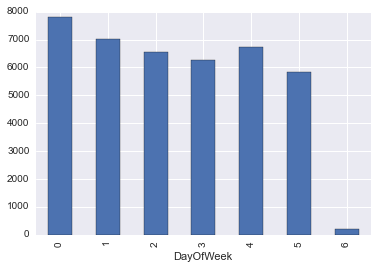

In [106]:
#Mean sales for day of week 
trainingData.groupby(['DayOfWeek']).Sales.mean().plot(kind = 'bar')


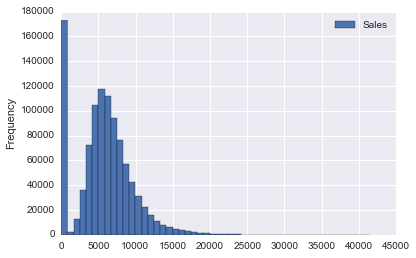

In [103]:
#Mean sales for competition distance
trainingData[['CompetitionDistance', 'Sales']].plot(kind='hist', x='CompetitionDistance', y='Sales', bins = 50)

In [62]:
# Extracting date, year, month, day of week and week of year from Date column
trainingData['date'] = pd.to_datetime(trainingData['Date'])
trainingData['year'] = pd.DatetimeIndex(trainingData['Date']).year
trainingData['month'] = pd.DatetimeIndex(trainingData['Date']).month
trainingData['DayOfWeek'] = pd.DatetimeIndex(trainingData['Date']).dayofweek
trainingData['WeekOfYear'] = pd.DatetimeIndex(trainingData['Date']).weekofyear

In [54]:
#Map each of the variables to a number
trainingData['StoreType'] = trainingData.StoreType.map({'a':0, 'b':1, 'c':2, 'd':3})
trainingData['Assortment'] = trainingData.Assortment.map({'a':0, 'b':1, 'c':2})
trainingData['StateHoliday'] =trainingData.StateHoliday.map({'a':0, 'b':1, 'c':2, '0':0})
trainingData['PromoInterval'] = trainingData.PromoInterval.map({'Jan, Apr,Jul, Oct':1, 'Feb,May,Aug,Nov':2, 'Mar,Jun,Sept,Dec':3})

In [63]:
# Calculate time competition open time in months
trainingData['CompetitionOpen'] = 12 * (trainingData.year - trainingData.CompetitionOpenSinceYear) + (trainingData.month - trainingData.CompetitionOpenSinceMonth)
# Promo open time in month
trainingData['PromoOpen'] = 12 * (trainingData.year - trainingData.Promo2SinceYear) + (trainingData.WeekOfYear - trainingData.Promo2SinceWeek) / 4.0


In [78]:
#Printing all the columns
trainingData.columns

Index([u'Store', u'DayOfWeek', u'Date', u'Sales', u'Customers', u'Open',
       u'Promo', u'StateHoliday', u'SchoolHoliday', u'StoreType',
       u'Assortment', u'CompetitionDistance', u'CompetitionOpenSinceMonth',
       u'CompetitionOpenSinceYear', u'Promo2', u'Promo2SinceWeek',
       u'Promo2SinceYear', u'PromoInterval', u'date', u'year', u'month',
       u'WeekOfYear', u'CompetitionOpen', u'PromoOpen'],
      dtype='object')

In [64]:
# Modeling using linear regression
from sklearn.linear_model import LinearRegression

feature_cols = ['CompetitionDistance', 'StoreType', 'Assortment','StateHoliday','Promo', 'Promo2', 'SchoolHoliday', 'DayOfWeek', 'month', 'WeekOfYear', 'CompetitionOpen', 'PromoOpen']

X = trainingData[feature_cols]
y = trainingData.Sales

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
lm = LinearRegression()
lm.fit(X_train, y_train)

# make predictions for testing set
y_pred = lm.predict(X_test)

from sklearn import metrics
import numpy as np
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))


3125.64751879


In [65]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(lm, X, y, cv=10, scoring='mean_squared_error')
print scores
mse_scores = -scores
rmse_scores = np.sqrt(mse_scores).mean()
print rmse_scores

[ -7396129.33150961  -7203988.59659587 -12219405.62699864
 -10410567.21131408 -12075003.71397908  -9674796.35897736
 -10502174.74912215 -11325189.56882767  -7482946.48855969
  -9930833.11045724]
3120.39367683


In [66]:
#Obtaining Null RMSE
# create a NumPy array with the same shape as y_test
y_null = np.zeros_like(y, dtype=float)
# fill the array with the mean value of y_test
y_null.fill(y.mean())

from sklearn import metrics
# compute null RMSE
print np.sqrt(metrics.mean_squared_error(y, y_null))

3849.92428284


In [67]:
#Modeling using Ridge regression
from sklearn.linear_model import Ridge
# try alpha=0.1
ridgereg = Ridge(alpha=0.1, normalize=True)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

3130.72527851


In [68]:
# create an array of alpha values
alpha_range = 10.**np.arange(-2, 3)
alpha_range

array([  1.00000000e-02,   1.00000000e-01,   1.00000000e+00,
         1.00000000e+01,   1.00000000e+02])

In [69]:
# select the best alpha with RidgeCV
from sklearn.linear_model import RidgeCV
ridgeregcv = RidgeCV(alphas=alpha_range, normalize=True, scoring='mean_squared_error')
ridgeregcv.fit(X_train, y_train)
ridgeregcv.alpha_

0.01

In [70]:
# predict method uses the best alpha value
y_pred = ridgeregcv.predict(X_test)
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

3125.74220601


In [71]:
#Modeling using Lasso Regression
# try alpha=0.001 and examine coefficients
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.001, normalize=True)
lassoreg.fit(X_train, y_train)
print lassoreg.coef_
y_pred = lassoreg.predict(X_test)
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

[ -2.21673485e-02  -6.13548759e+01   3.41410493e+02  -3.78337186e+03
   2.47152784e+03  -9.76836574e+02   1.91667292e+02  -6.51816039e+02
   8.38570447e-01   1.48955081e+01   2.49265534e-01   6.26646959e+00]
3125.64803694


In [72]:
# try alpha=0.01 and examine coefficients
lassoreg = Lasso(alpha=0.01, normalize=True)
lassoreg.fit(X_train, y_train)
print lassoreg.coef_

[ -2.07141551e-02  -5.42223409e+01   3.28212125e+02  -3.71609823e+03
   2.46139583e+03  -9.06976189e+02   1.70383728e+02  -6.49593923e+02
   0.00000000e+00   1.46746525e+01   1.42903038e-01   4.92476981e+00]


In [73]:
# calculate RMSE (for alpha=0.01)
y_pred = lassoreg.predict(X_test)
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

3125.86080324


In [74]:
# select the best alpha with LassoCV
from sklearn.linear_model import LassoCV
lassoregcv = LassoCV(n_alphas=10, normalize=True, random_state=1)
lassoregcv.fit(X_train, y_train)
lassoregcv.alpha_

C:\Users\Kruthika\Anaconda\lib\site-packages\sklearn\linear_model\base.py:424: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if precompute == 'auto':


0.0020357109349942418

In [75]:
# examine the coefficients
print lassoregcv.coef_

[ -2.20001047e-02  -6.05340726e+01   3.39891658e+02  -3.77563721e+03
   2.47035918e+03  -9.68794771e+02   1.89226850e+02  -6.51560262e+02
   7.11627127e-01   1.48768722e+01   2.37026260e-01   6.11200090e+00]


In [76]:
# predict method uses the best alpha value
y_pred = lassoregcv.predict(X_test)
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

3125.65409932
